<a href="https://colab.research.google.com/github/Saul-Ochoa/Time-Series/blob/main/Forecasting/FbProphet/Sales_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import shap

########################################
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor'  : '#212946',
    'axes.facecolor'    : '#212946',
    'savefig.facecolor' : '#212946',
    'axes.grid'         : True,
    'axes.grid.which'   : 'both',
    'axes.spines.left'  : False,
    'axes.spines.right' : False,
    'axes.spines.top'   : False,
    'axes.spines.bottom': False,
    'grid.color'        : '#2A3459',
    'grid.linewidth'    : '1',
    'text.color'        : '0.9',
    'axes.labelcolor'   : '0.9',
    'xtick.color'       : '0.9',
    'ytick.color'       : '0.9',
    'font.size'         : 12
}
plt.rcParams.update(dark_style)

# **Prophet**

In [37]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Time-Series/main/Forecasting/FbProphet/car-sales.csv'

In [38]:
df=pd.read_csv(url,sep=',')
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [39]:
df.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [40]:
df.shape

(108, 2)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [42]:
df['Month']=pd.to_datetime(df['Month'],format='%Y-%m-%d')
df.head()

,Month,Sales
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [43]:
df.set_index('Month',inplace=True)
df.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


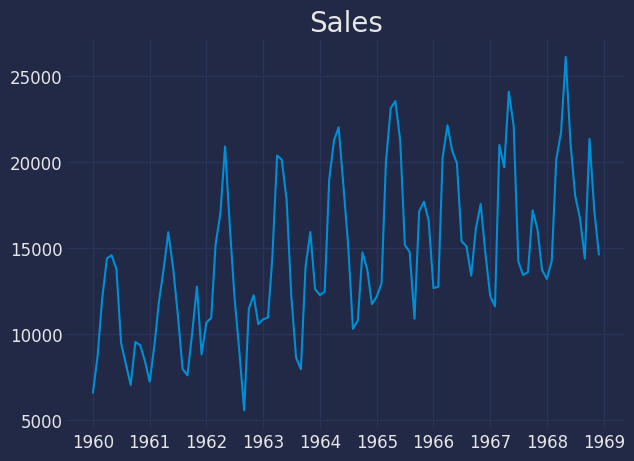

In [44]:
plt.plot(df,label='Month')
plt.title('Sales',fontsize=20)
plt.show()

In [45]:
fig=px.line(df,x=df.index,y='Sales',title='Sales')
fig.show()

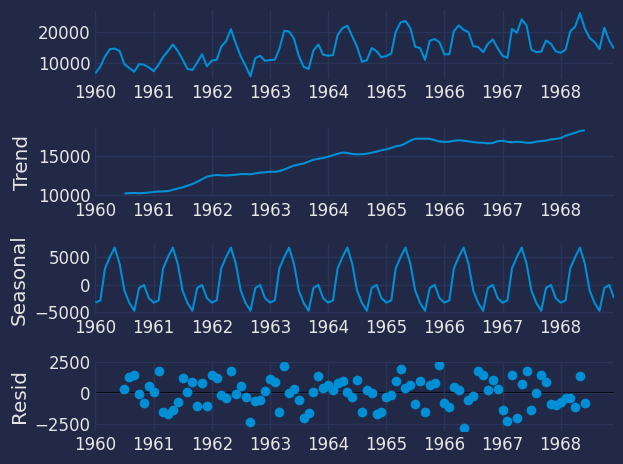

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data=seasonal_decompose(df,model='additive')
decompose_data.plot()
plt.show()

# **Test Stationarity**

In [47]:
def test_stationarity(timeseries):
  timeseries.dropna(inplace=True)
  rolmean=timeseries.rolling(window=12).mean() #promedio
  rolstd=timeseries.rolling(window=12).std() #STD

  orig=plt.plot(timeseries,label='Original')
  mean=plt.plot(rolmean,label='Rolling mean')
  std=plt.plot(rolstd,label='Rolling std')


  plt.legend(loc='best')
  plt.title('TimeSeries data with rolling mean and std')
  plt.show()

  from statsmodels.tsa.stattools import adfuller

  df_test=adfuller(timeseries)
  df_output=pd.Series(df_test[0:4],index=['The Test statistic','Mackinnons aproximate p-value','usedLags','NOBS'])
  print('')
  print(df_output)

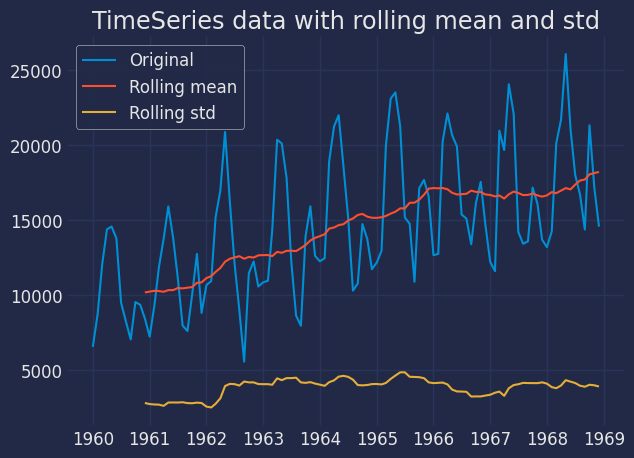


The Test statistic               -1.223813
Mackinnons aproximate p-value     0.663269
usedLags                         12.000000
NOBS                             95.000000
dtype: float64


In [48]:
test_stationarity(df)

**Log**

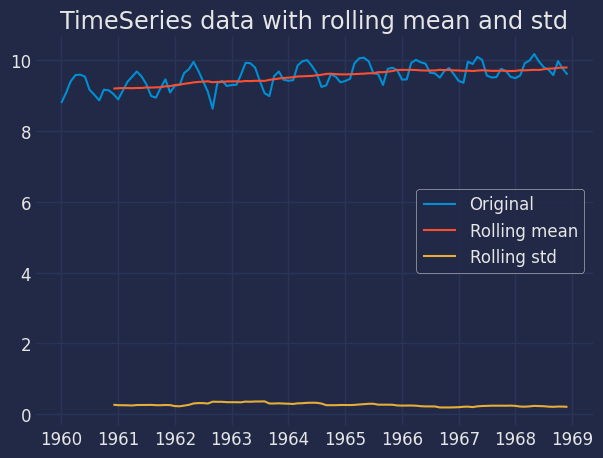


The Test statistic               -1.452425
Mackinnons aproximate p-value     0.556901
usedLags                         13.000000
NOBS                             94.000000
dtype: float64


In [49]:
df_log=np.log(df)
test_stationarity(df_log)

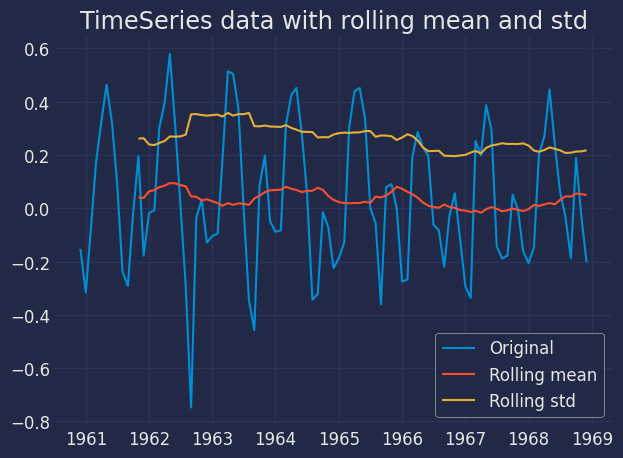


The Test statistic               -2.023542
Mackinnons aproximate p-value     0.276347
usedLags                         12.000000
NOBS                             84.000000
dtype: float64


In [50]:
ma=df_log.rolling(window=12).mean()
df_log_ma=df_log-ma
test_stationarity(df_log_ma)

# **Prophet**

In [16]:
pip install prophet==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from prophet.forecaster import *

In [54]:
df_1=pd.read_csv(url,sep=',')
df_1.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [55]:
df_1['Month']=pd.to_datetime(df_1['Month'],format='%Y-%m-%d')
df_1.head()

,Month,Sales
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [56]:
from prophet import Prophet
from sklearn.model_selection import train_test_split
model_prophet=Prophet()
df_1.columns = ['ds', 'y']
train,test=train_test_split(df_1,test_size=0.10,shuffle=False)
model_prophet_fit=model_prophet.fit(train)
future=model_prophet.make_future_dataframe(periods=11,freq='M')
predictions=model_prophet.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8_0xls_v/m_18spna.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8_0xls_v/m6rk_aaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69153', 'data', 'file=/tmp/tmp8_0xls_v/m_18spna.json', 'init=/tmp/tmp8_0xls_v/m6rk_aaw.json', 'output', 'file=/tmp/tmp8_0xls_v/prophet_modeleb59dz5f/prophet_model-20230615023551.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:35:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:35:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


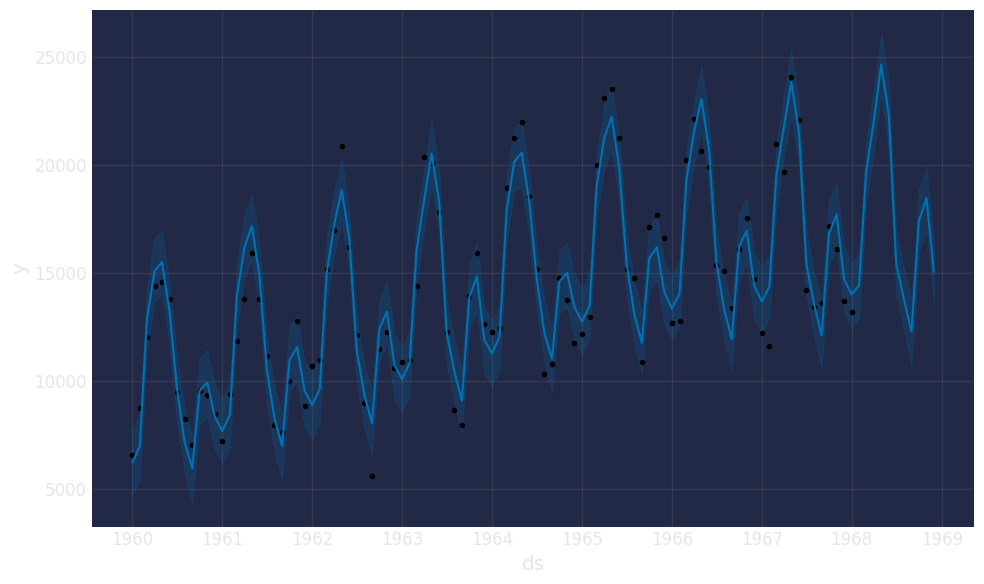

In [70]:
model_prophet.plot(predictions)
plt.show()

In [61]:
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
103,1968-07-31,17553.394970,12368.158516,15272.403377,17528.865130,17577.976482,-3755.778363,-3755.778363,-3755.778363,-3755.778363,-3755.778363,-3755.778363,0.0,0.0,0.0,13797.616606
104,1968-08-31,17586.639909,10672.613143,13744.615117,17557.078858,17615.059180,-5291.209515,-5291.209515,-5291.209515,-5291.209515,-5291.209515,-5291.209515,0.0,0.0,0.0,12295.430394
105,1968-09-30,17618.812430,15955.626187,18880.557231,17582.905211,17654.859651,-196.694076,-196.694076,-196.694076,-196.694076,-196.694076,-196.694076,0.0,0.0,0.0,17422.118354
106,1968-10-31,17652.057369,16971.949326,19997.433203,17609.844770,17695.104424,820.754480,820.754480,820.754480,820.754480,820.754480,820.754480,0.0,0.0,0.0,18472.811848
107,1968-11-30,17684.229890,13602.574912,16433.360517,17635.682714,17734.838358,-2666.835070,-2666.835070,-2666.835070,-2666.835070,-2666.835070,-2666.835070,0.0,0.0,0.0,15017.394820


MAE: 3713862.362


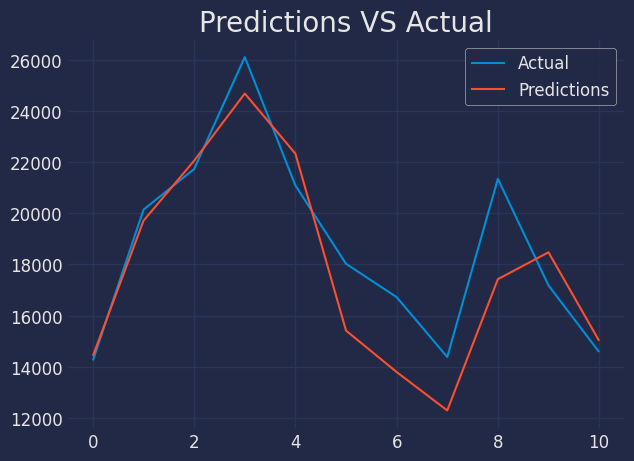

In [68]:
from sklearn.metrics import mean_squared_error
y_true=test['y'].values
y_pred=predictions['yhat'][-11:].values
mae=mean_squared_error(y_true,y_pred)
print('MAE: %.3f' % mae)
plt.plot(y_true,label='Actual')
plt.plot(y_pred,label='Predictions')
plt.title('Predictions VS Actual',fontsize=20)
plt.legend()
plt.show()